## **Loading Dataset**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('Ecommerce Customers.csv')

In [27]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [28]:
df.shape

(500, 8)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [30]:
df.duplicated().sum()

0

In [31]:
len(df['Email'].unique())

500

In [32]:
len(df['Avatar'].unique())

138

In [33]:
len(df['Address'].unique())

500

In [34]:
df = df.drop(columns=['Email','Avatar','Address'])

In [35]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [36]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## **Exploratory Data Analysis**

#### **1. Average Session Length**

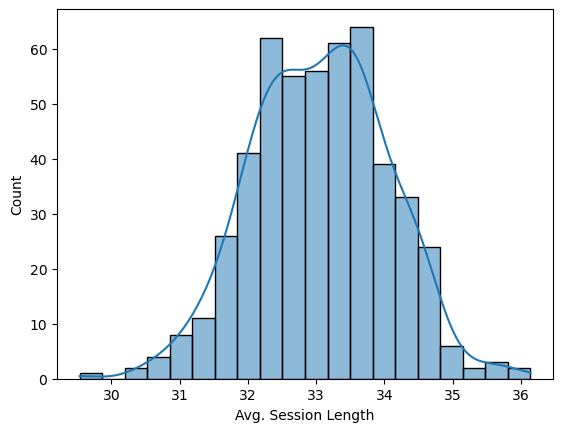

In [37]:
sns.histplot(x=df['Avg. Session Length'], data=df,kde=True)
plt.show()

In [38]:
df['Avg. Session Length'].skew()

-0.03217480705175727

#### **2. Time on App**

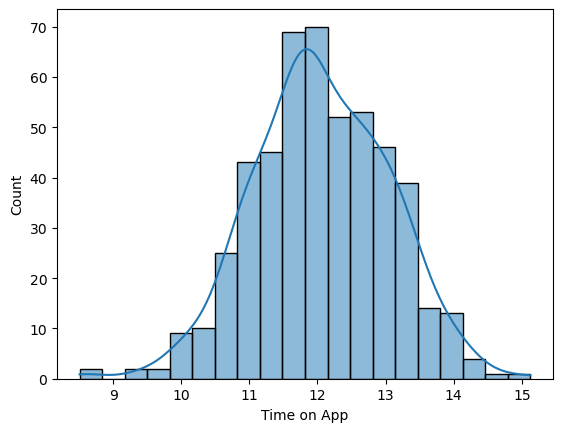

In [39]:
sns.histplot(x=df['Time on App'], data=df,kde=True)
plt.show()

In [40]:
df['Time on App'].skew()

-0.08912109751093247

#### **3. Time on Website**

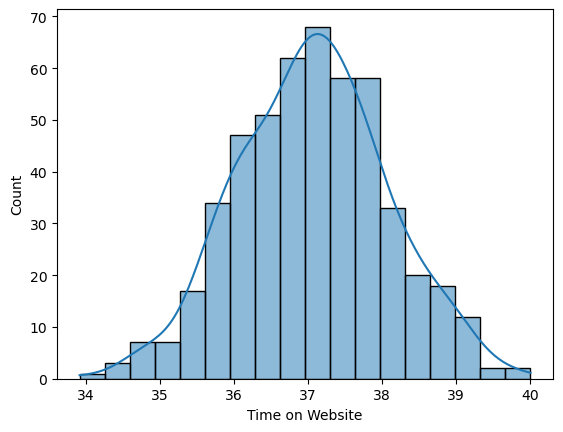

In [41]:
sns.histplot(x=df['Time on Website'], data=df,kde=True)
plt.show()

In [42]:
df['Time on Website'].skew()

0.012141880271484171

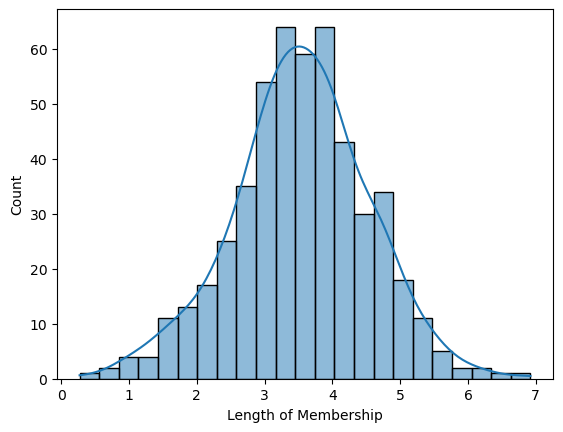

In [43]:
sns.histplot(x=df['Length of Membership'], data=df,kde=True)
plt.show()

In [44]:
df['Length of Membership'].skew()

-0.10660805308864045

#### **4. Checking Outliers**

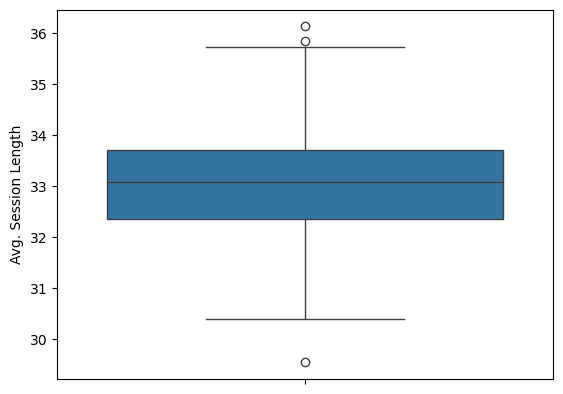

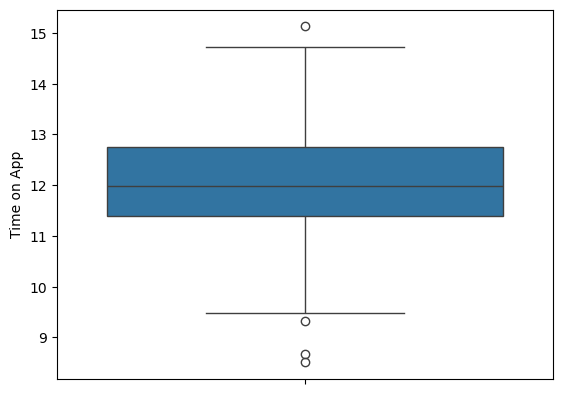

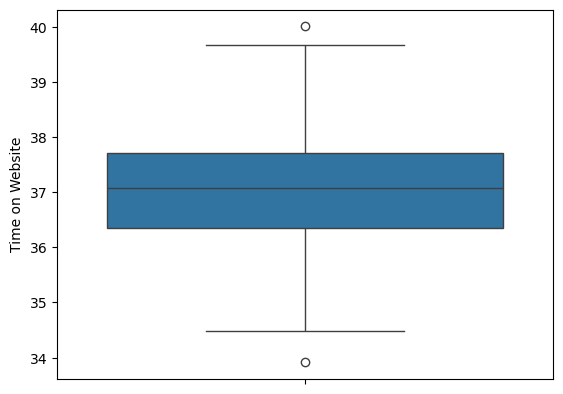

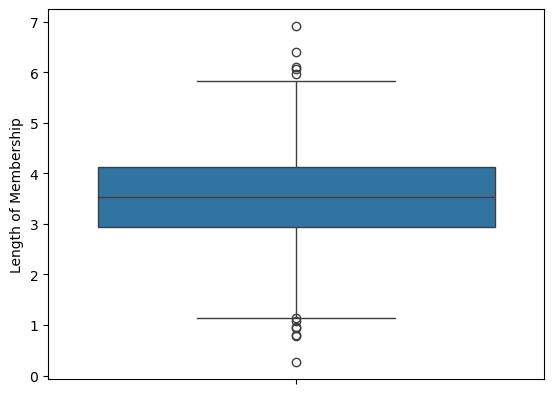

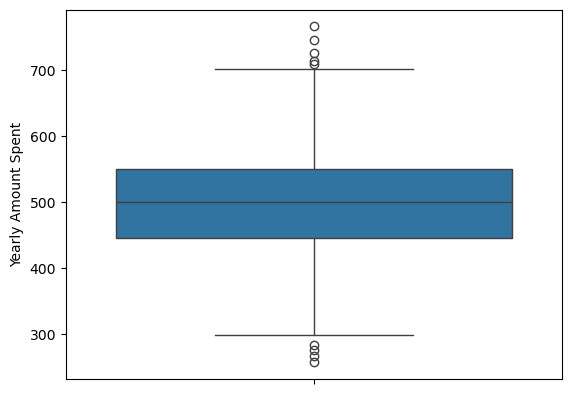

In [45]:
for col in df.columns[:]:
    sns.boxplot(df[col])
    plt.show()

#### **5. Pairplot**

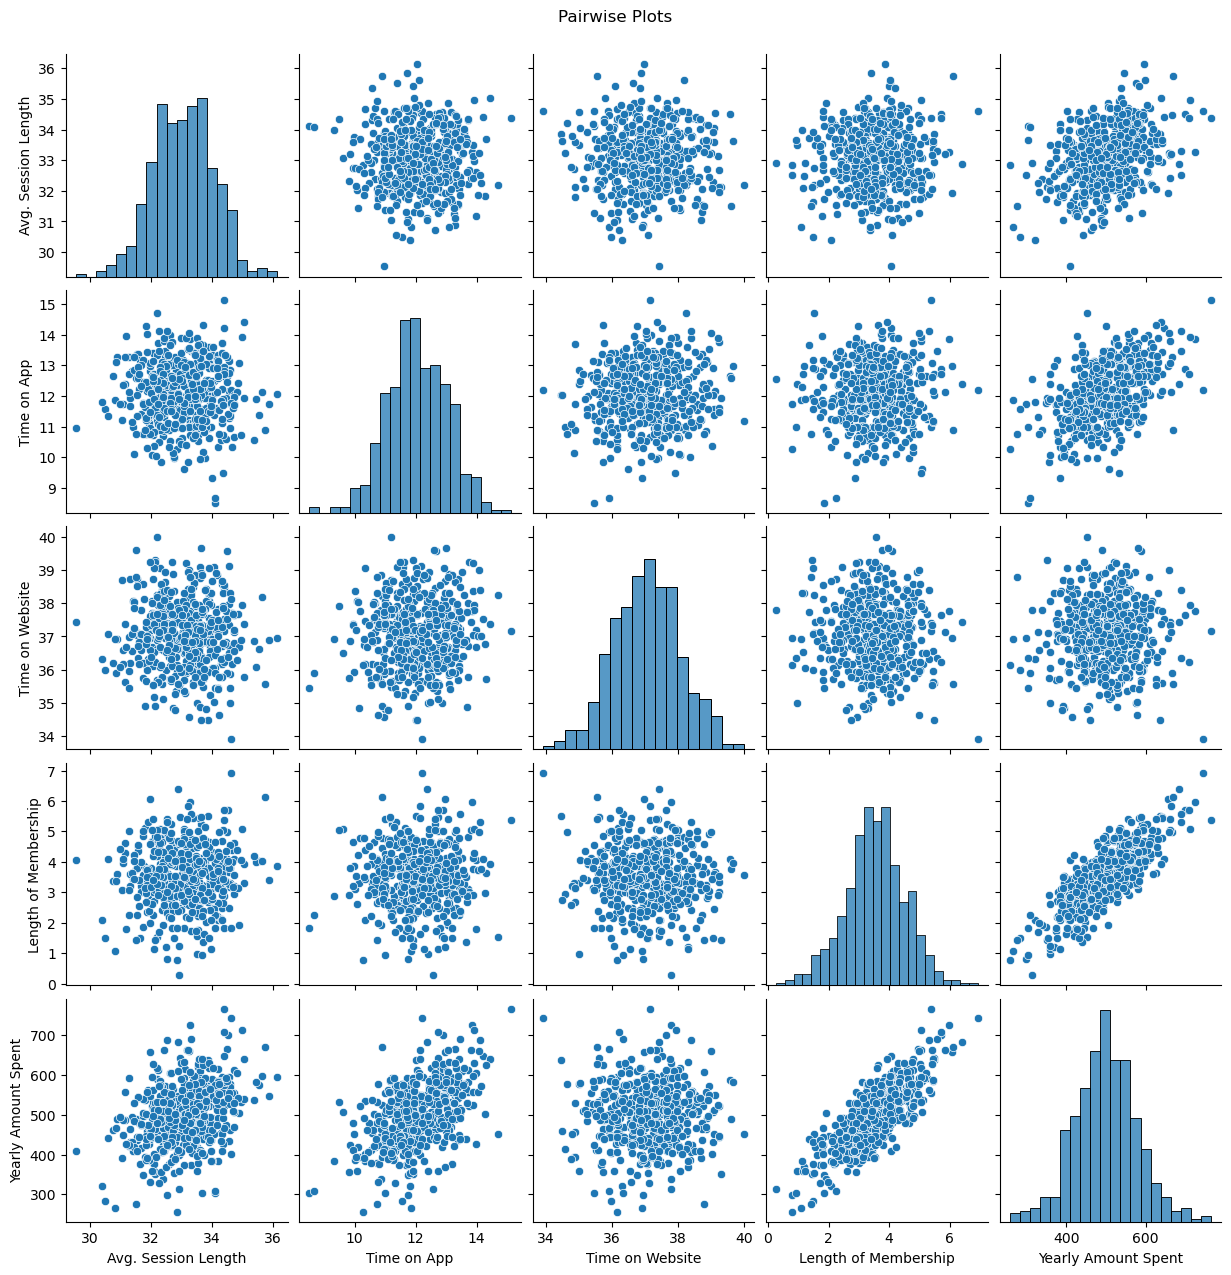

In [46]:
sns.pairplot(df)
plt.suptitle("Pairwise Plots", y=1.02)
plt.show()

#### **6. Features Vs Target**

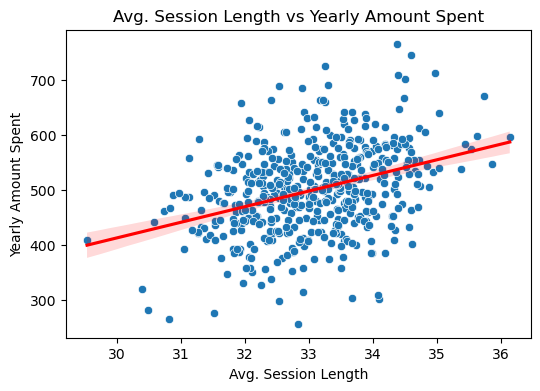

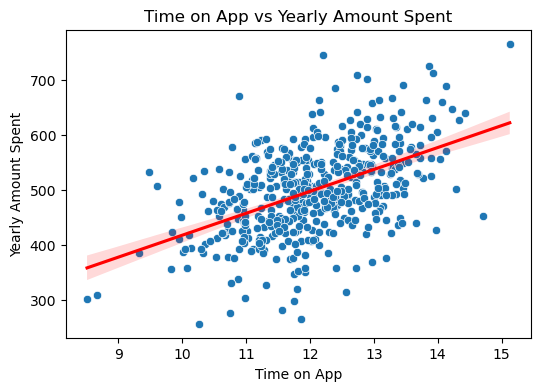

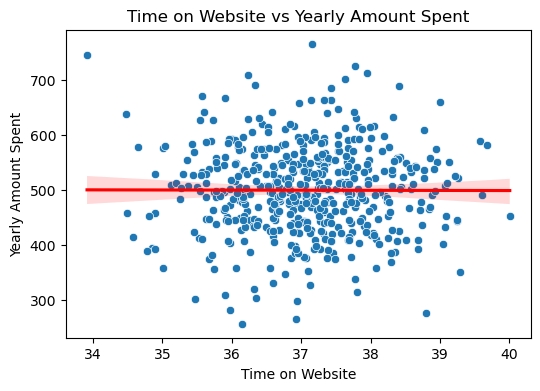

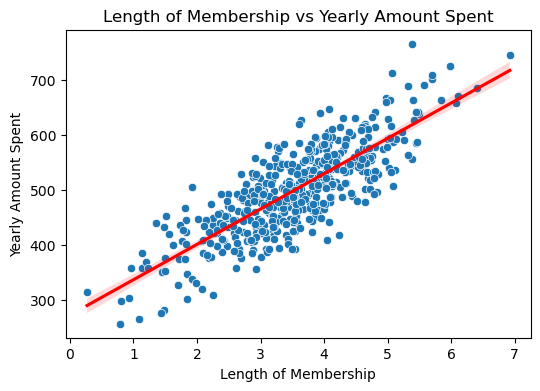

In [48]:
for col in df.columns[:-1]:  # excluding 'Yearly Amount Spent' itself
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='Yearly Amount Spent', data=df)
    sns.regplot(x=col, y='Yearly Amount Spent', data=df, scatter=False, color='red')
    plt.title(f'{col} vs Yearly Amount Spent')
    plt.show()

#### **7. Correlation Heatmap**

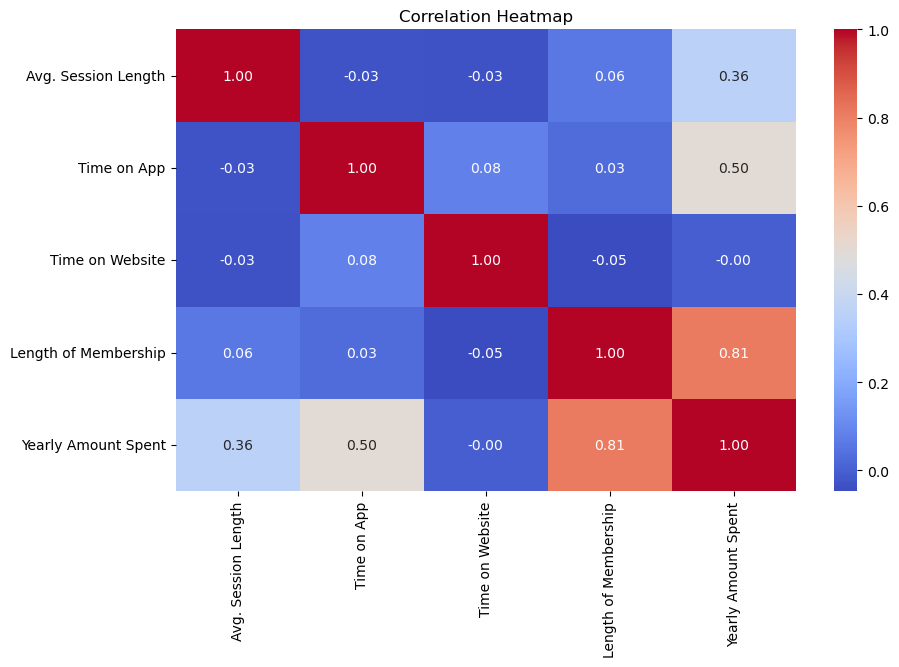

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## **Feature Engineering**

#### **Handling Outliers**

In [50]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df.shape

(476, 5)

#### **Checking Multicolinearity**

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = df.drop('Yearly Amount Spent', axis=1) 

X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,feature,VIF
0,const,2796.523836
1,Avg. Session Length,1.001601
2,Time on App,1.008345
3,Time on Website,1.006150
4,Length of Membership,1.004977


Dataset has no multicolinearity.

## **Feature Selection**

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df.drop('Yearly Amount Spent', axis=1)
y = df['Yearly Amount Spent']

model = LinearRegression()

rfe = RFE(model, n_features_to_select=3)

rfe = rfe.fit(X, y)

selected_features_rfe = X.columns[rfe.support_]

print("Selected features using RFE:")
print(selected_features_rfe)

Selected features using RFE:
Index(['Avg. Session Length', 'Time on App', 'Length of Membership'], dtype='object')


In [53]:
new_df = df[selected_features_rfe]
new_df["Yearly Amount Spent"] = df["Yearly Amount Spent"]
new_df.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092


## **Model Building**

In [54]:
X = new_df.drop('Yearly Amount Spent', axis=1)
y = new_df['Yearly Amount Spent']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(alpha=1),
    'Ridge': Ridge(alpha=1),
    'ElasticNet': ElasticNet(alpha=1, l1_ratio=0.5)
}

for name, model in models.items():
    
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    
    print(f"{name}\nMean Squared Error: {mse:.2f}\nMean Absolute Error : {mae:.2f}\nR2 Score: {r2:.2f}\n")

Linear Regression
Mean Squared Error: 104.97
Mean Absolute Error : 8.07
R2 Score: 0.98

Lasso
Mean Squared Error: 106.20
Mean Absolute Error : 8.25
R2 Score: 0.98

Ridge
Mean Squared Error: 104.92
Mean Absolute Error : 8.08
R2 Score: 0.98

ElasticNet
Mean Squared Error: 739.15
Mean Absolute Error : 22.21
R2 Score: 0.85



## **Hyperparameter Tuning with ElasticNnet**

In [57]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define the Ridge model
ridge = Ridge()

# Step 2: Define hyperparameter grid (only 'alpha' for Ridge)
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]
}

# Step 3: Grid search with 5-fold CV using Negative MAE
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_absolute_error')

# Step 4: Fit on training data
grid_search.fit(X_train_scaled, y_train)

# Step 5: Report best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (Negative MAE): {grid_search.best_score_}")

Best Parameters: {'alpha': 1.0}
Best Score (Negative MAE): -8.07131524573477


In [58]:
# Step 6: Retrain Ridge with best parameters
best_ridge = Ridge(alpha=grid_search.best_params_['alpha'])
best_ridge.fit(X_train_scaled, y_train)

# Step 7: Evaluate on test data
y_pred = best_ridge.predict(X_test_scaled)

print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2: {r2_score(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

MSE: 104.92
R2: 0.98
MAE: 8.08


## **Save the Model**

In [59]:
import joblib
joblib.dump(best_ridge, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Vizualize Performance

#### **1. Actual vs Predicted**

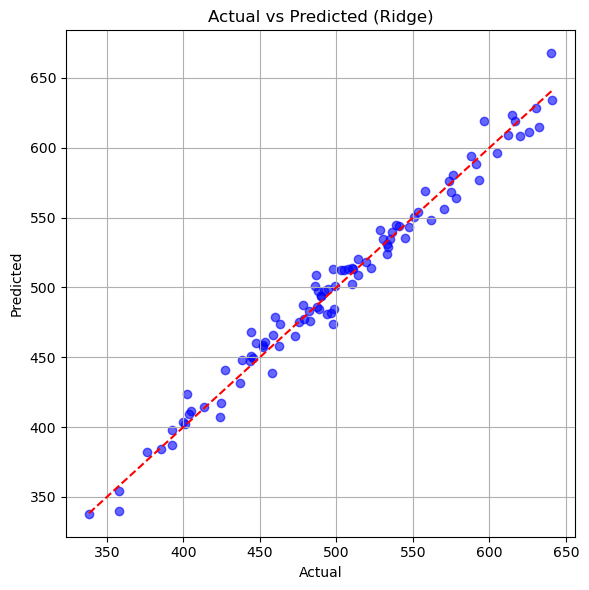

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Ridge)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### **2. Residual Plot**

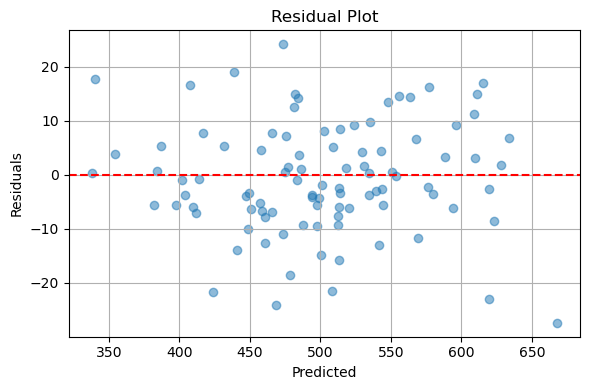

In [61]:
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()